In [1]:
import numpy as np
import matplotlib.pyplot as plt

USING HIGH PASS FILTER


In [2]:
def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    t = np.linspace(0, 1, num_samples)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
    return noisy_signal

In [3]:
# Parameters
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
noise_level = 0.5  # Level of noise to add to the sine wave
num_samples = 1000 # Number of samples in the sine wave

In [4]:
noisy_signal= generate_noisy_sine_wave(frequency,amplitude,noise_level,num_samples)
t= np.linspace(0, 1, num_samples)

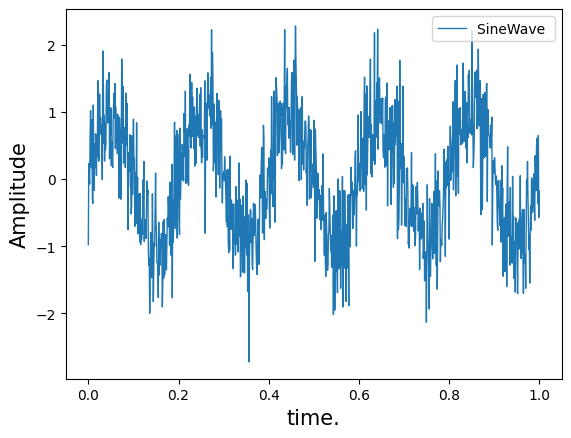

In [5]:

plt.plot(t, noisy_signal, linewidth=1, label='SineWave ')

plt.xlabel('time.', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')


In [6]:

#Here we are applying FFT to convert from time domain to Frequency Domain
n = len(t)
fhat = np.fft.fft(noisy_signal, n)                 
psd = fhat * np.conj(fhat) / n                  # computing power spectral density 
freq = (1 / (num_samples * n)) * np.arange(n)   # creating a frequency matrix 
idxs_half = np.arange(1, np.floor(n / 2), dtype=np.int32)  

c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


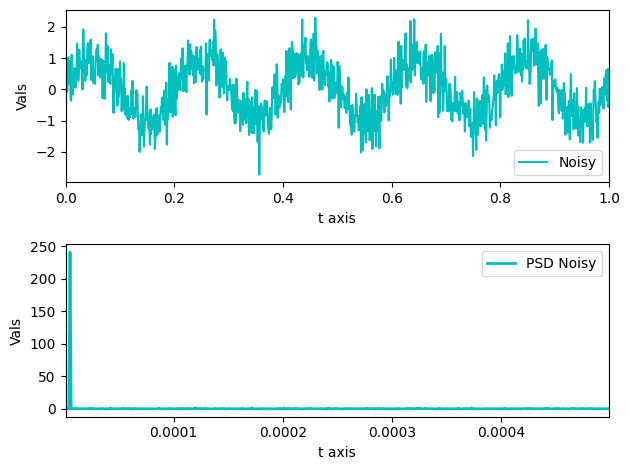

In [7]:
fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(t, noisy_signal, color='c', linewidth=1.5, label='Noisy')
plt.xlim(t[0], t[-1])
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[idxs_half], psd[idxs_half], color='c', linewidth=2, label='PSD Noisy')
plt.xlim(freq[idxs_half[0]], freq[idxs_half[-1]])

plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.tight_layout()

In [8]:
#applying high pass filter
threshold = 100 
psd_idxs = psd > threshold # this will be the array of 0 and 1
psd_clean = psd * psd_idxs # zero out all the unnecessary powers
fhat_clean = psd_idxs * fhat # used to retreive the signal

signal_filtered = np.fft.ifft(fhat_clean) # inverse fourier transform

In [9]:
min_signal,max_signal=noisy_signal.min(),noisy_signal.max()

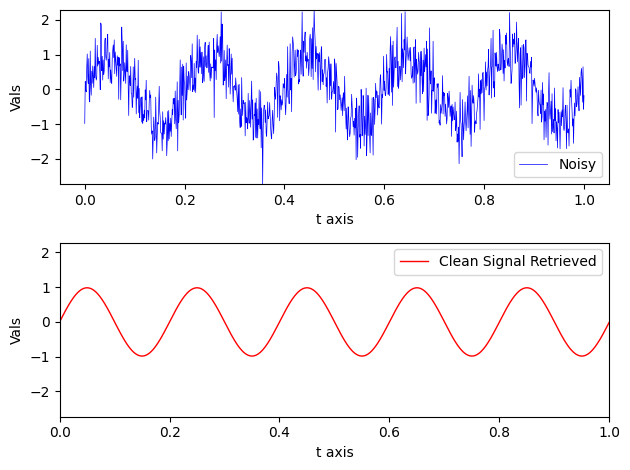

In [10]:
fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(t, noisy_signal, color='b', linewidth=0.5, label='Noisy')
plt.ylim(min_signal, max_signal)
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.sca(axs[1])
plt.plot(t, signal_filtered, color='r', linewidth=1, label='Clean Signal Retrieved')
plt.xlim(t[0], t[-1])
plt.ylim(min_signal, max_signal)
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.tight_layout()

Using Frequency Domain Filter through DFT

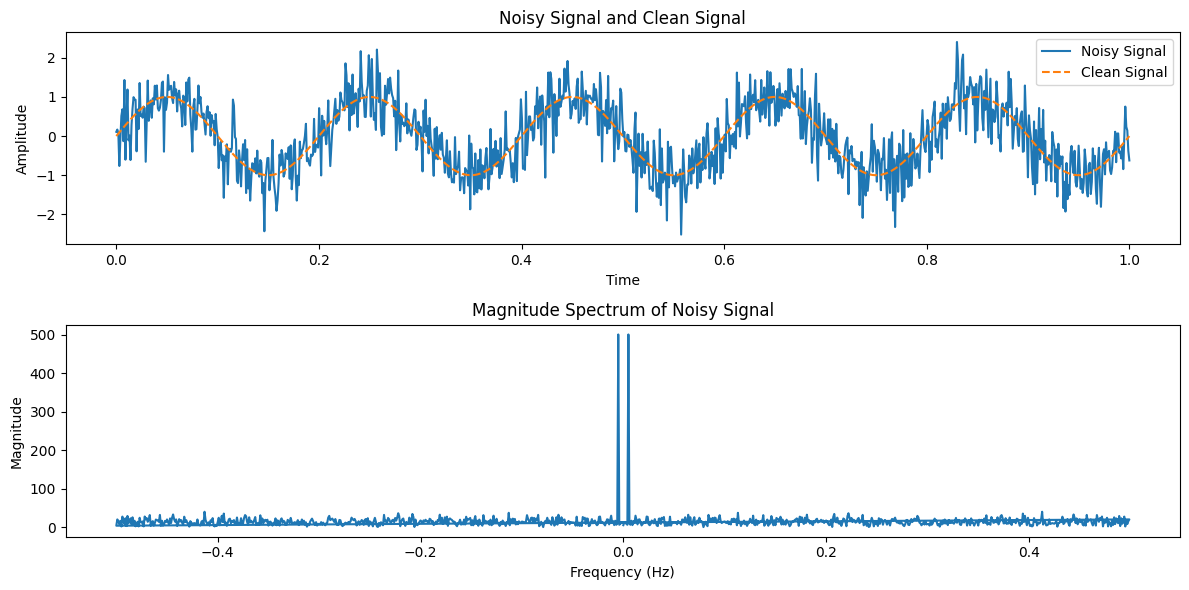

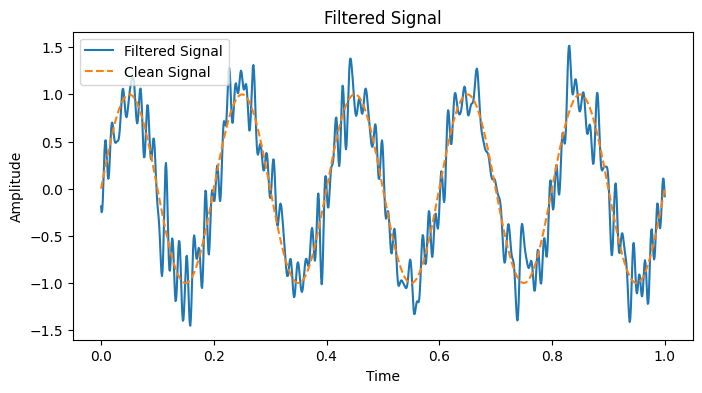

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    t = np.linspace(0, 1, num_samples)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
    return noisy_signal, clean_signal, t

def plot_signal_and_spectrum(noisy_signal, clean_signal, sample_rate):
    plt.figure(figsize=(12, 6))
    
    # Plot the noisy signal
    plt.subplot(2, 1, 1)
    plt.plot(sample_rate, noisy_signal, label='Noisy Signal')
    plt.plot(sample_rate, clean_signal, label='Clean Signal', linestyle='--')
    plt.title('Noisy Signal and Clean Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

    fft_result = np.fft.fft(noisy_signal)    #compute Dft
    freqs = np.fft.fftfreq(len(noisy_signal))

    plt.subplot(2, 1, 2)                            #plot magnitute of freq vs freqa
    plt.plot(freqs, np.abs(fft_result))
    plt.title('Magnitude Spectrum of Noisy Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

def frequency_domain_filtering(noisy_signal, freq_cutoff):
    fft_result = np.fft.fft(noisy_signal)           #compute fourier transfor
    freqs = np.fft.fftfreq(len(noisy_signal))       #computes frequencies corresponding to Fourier coeffs
    fft_result_filtered = fft_result.copy()         #making a copy fft result to preserve it
    fft_result_filtered[np.abs(freqs) > freq_cutoff] = 0        #setting a frequency cutofff
    filtered_signal = np.fft.ifft(fft_result_filtered).real     # comupting inverse fft and taking its real part
    return filtered_signal

# Parameters
freq = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
noise_level = 0.5  # Level of noise to add
num_samples = 1000  # Number of samples
freq_cutoff = 0.1  # Cutoff frequency for filtering

noisy_signal, clean_signal, t = generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples)


plot_signal_and_spectrum(noisy_signal, clean_signal, t)

# Apply frequency domain filtering
filtered_signal = frequency_domain_filtering(noisy_signal, freq_cutoff)

plt.figure(figsize=(8, 4))
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.plot(t, clean_signal, label='Clean Signal', linestyle='--')
plt.title('Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


USING LINEAR FILTER THROUGH DFT]



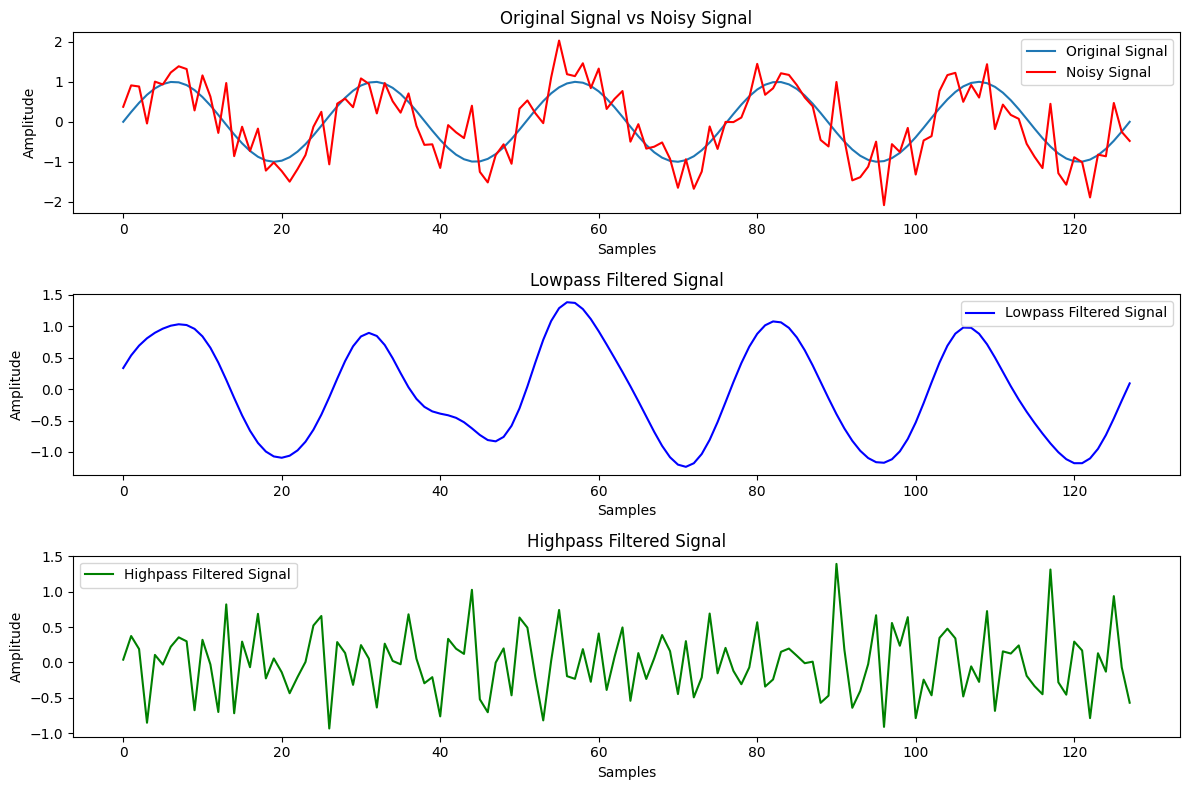

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_noisy_sine_wave(freq, amplitude, noise_level, num_samples):
    """
    Generate a noisy sine wave signal.

    Parameters:
    - freq: Frequency of the sine wave.
    - amplitude: Amplitude of the sine wave.
    - noise_level: Standard deviation of the noise.
    - num_samples: Number of samples in the signal.

    Returns:
    - clean_signal: Original clean signal.
    - noisy_signal: Noisy sine wave signal.
    """
    t = np.linspace(0, 1, num_samples)
    clean_signal = amplitude * np.sin(2 * np.pi * freq * t)
    noise = np.random.normal(scale=noise_level, size=num_samples)
    noisy_signal = clean_signal + noise
    return clean_signal, noisy_signal

def linear_filter(noisy_signal, filter_type='lowpass', cutoff_freq=0.2):
    # Compute the Discrete Fourier Transform (DFT) of the noisy signal
    fft_noisy = np.fft.fft(noisy_signal)
    
    # Create a filter in the frequency domain
    frequencies = np.fft.fftfreq(len(noisy_signal))
    if filter_type == 'lowpass':
        filter_mask = (np.abs(frequencies) <= cutoff_freq)
    elif filter_type == 'highpass':
        filter_mask = (np.abs(frequencies) >= cutoff_freq)
    else:
        raise ValueError("Invalid filter type. Choose 'lowpass' or 'highpass'.")
    
    # Apply the filter
    fft_filtered = fft_noisy * filter_mask
    
    # Compute the inverse DFT to get the filtered signal
    filtered_signal = np.fft.ifft(fft_filtered).real
    return filtered_signal

# Given clean and noisy signals
clean_signal, noisy_signal = generate_noisy_sine_wave(5, 1, 0.5, 128)

# Apply linear filtering to the noisy signal
filtered_signal_lowpass = linear_filter(noisy_signal, filter_type='lowpass', cutoff_freq=0.1)
filtered_signal_highpass = linear_filter(noisy_signal, filter_type='highpass', cutoff_freq=0.1)

# Plot signals
plt.figure(figsize=(12, 8))

# Plot original signal and noisy signal
plt.subplot(3, 1, 1)
plt.plot(clean_signal, label='Original Signal')
plt.plot(noisy_signal, label='Noisy Signal', color='red')
plt.title('Original Signal vs Noisy Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()

# Plot filtered signals
plt.subplot(3, 1, 2)
plt.plot(filtered_signal_lowpass, label='Lowpass Filtered Signal', color='blue')
plt.title('Lowpass Filtered Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(filtered_signal_highpass, label='Highpass Filtered Signal', color='green')
plt.title('Highpass Filtered Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
